**Normal-Metal - Interface - Superconductor**

In [1]:
import sys; sys.path.append('../')

from libs.models import *
from libs.plot import *
import numpy as np

In [2]:
# Parameters
I     = 1.0  # Current                             - [A]
R0_NM = 10.0 # Normal-Metal Resistance             - [Ω]
α_NM  = 0.02 # Normal-Metal Linear Coefficient     - [1/K]
R0_I  = 15.0 # Interface Resistance                - [Ω]
TC_I  = 15.2 # Interface Critical Temperature      - [K]
ΔT_I  = 0.10 # Interface Delta Temperature         - [K]
R0_S  = 20.0 # Superconductor Resistance           - [Ω]
TC_S  = 14.8 # Superconductor Critical Temperature - [K]
ΔT_S  = 0.15 # Superconductor Delta Temperature    - [K]

**1. Resistance vs Temperature:**

In [3]:
# Temperature
T = np.linspace(13.0, 17.0, 100)

# Resistances
R_NM = resistance_NM(T, R0_NM, α_NM)      # Normal-Metal
R_I  = resistance_I(T, R0_I, TC_I, ΔT_I)  # Interface
R_S  = resistance_S(T, R0_S, TC_S, ΔT_S)  # Superconductor
R_E  = resistance_NMIS(R_NM, R_I, R_S)    # Equivalent Resistance

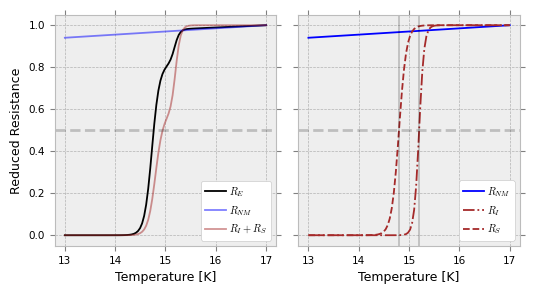

In [4]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust(wspace=0.10)

# 1st Axis
ax[0].plot(T, R_E/np.max(R_E), color='black', linewidth=lw_, label=r'$R_{E}$')
ax[0].plot(T, R_NM/np.max(R_NM), color='blue', linewidth=lw_, label=r'$R_{NM}$', alpha=alp3_)
ax[0].plot(T, (R_S + R_I) / np.max(R_S + R_I), color='brown', linewidth=lw_, label=r'$R_{I} + R_{S}$', alpha=alp3_)
ax[0].axhline(0.5, color='black', linestyle='--', alpha=alp2_)
ax[0].tick_params(axis='x', bottom=True, top=True, labelbottom=True, labeltop=False, direction='out', colors='gray', labelcolor='black')
ax[0].tick_params(axis='y', left=True, right=True, labelleft=True, labelright=False, direction='out', colors='gray', labelcolor='black')
ax[0].set_xlabel('Temperature [K]', fontsize=fs2_); ax[0].set_ylabel('Reduced Resistance', fontsize=fs2_)
ax[0].set_xlim([12.8, 17.2]); ax[0].set_xticks(np.linspace(13, 17, 5)); ax[0].set_ylim([-0.05, 1.05])
ax[0].legend(facecolor='white', fontsize=fs1_, framealpha=alp1_, handletextpad=0.3).set_zorder(2)

# 2nd Axis
ax[1].plot(T, R_NM/np.max(R_NM), color='blue', linewidth=lw_, label=r'$R_{NM}$')
ax[1].plot(T, R_I / np.max(R_I), color='brown', linestyle='-.', linewidth=lw_, label=r'$R_{I}$')
ax[1].plot(T, R_S/np.max(R_S), color='brown', linestyle='--', linewidth=lw_, label=r'$R_{S}$')
ax[1].axvline(TC_S, color='black', linewidth=lw_, alpha=alp2_); ax[1].axvline(TC_I, color='black', linewidth=lw_, alpha=alp2_)
ax[1].axhline(0.5, color='black', linestyle='--', alpha=alp2_)
ax[1].tick_params(axis='x', bottom=True, top=True, labelbottom=True, labeltop=False, direction='out', colors='gray', labelcolor='black')
ax[1].tick_params(axis='y', left=True, right=True, labelleft=True, labelright=False, direction='out', colors='gray', labelcolor='black')
ax[1].set_xlabel('Temperature [K]', fontsize=fs2_)
ax[1].set_xlim([12.8, 17.2]); ax[1].set_xticks(np.linspace(13, 17, 5))
ax[1].set_ylim([-0.05, 1.05]); ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0]); ax[1].set_yticklabels([])
ax[1].legend(facecolor='white', fontsize=fs1_, framealpha=alp1_, handletextpad=0.3).set_zorder(2)

plt.show()

In [5]:
# Save
np.savetxt('./output/NM-I-S.txt', np.c_[T, R_E], fmt = ['%19.15e', '%21.15e'], header = '%19s %21s'%('T [K]', 'R [Ω]'))
fig.savefig('./output/Figure_NM-I-S.jpg', bbox_inches='tight', pad_inches=0.2, dpi=300)

**2. Currents vs Temperature:**

In [6]:
 # Temperatures
T_min  = T[0]
T_max  = T[-1]
T_mid  = 0.5 * (TC_S + TC_I)
T_vals = np.array([T_max, T_mid, T_min])

# Resistances
R_NM_vals = resistance_NM(T_vals, R0_NM, α_NM)
R_I_vals  = resistance_I(T_vals, R0_I, TC_I, ΔT_I)
R_S_vals  = resistance_S(T_vals, R0_S, TC_S, ΔT_S)
R_E_vals  = resistance_NMIS(R_NM_vals, R_I_vals, R_S_vals)

# Currents
I_NM_vals = current_NM(I, R_E_vals, R_NM_vals)
I_IS_vals = current_IS(I, R_E_vals, R_I_vals, R_S_vals)

for t, i1, i2 in zip(T_vals, I_NM_vals, I_IS_vals):
  print(f'T = {t:5.2f} K --> I_NM = {i1:4.2f} A and I_IS = {i2:4.2f} A')

T = 17.00 K --> I_NM = 0.72 A and I_IS = 0.28 A
T = 15.00 K --> I_NM = 0.59 A and I_IS = 0.41 A
T = 13.00 K --> I_NM = 0.00 A and I_IS = 1.00 A
